In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
import sys

In [6]:
!{sys.executable} -m pip install citipy

  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl


In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from datetime import datetime

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88e98b69e0edd5cbed56213489c1aac4


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | wagar
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | boundiali
Processing Record 11 of Set 1 | akdepe
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | ternate
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | tungkang
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | wick
Processing Record 18 of Set 1 | kivsharivka
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | gualaceo
Processing Record 21 of Set 1 | englewood
Processing Record 22 of Set 1 | poum
Processing Record 23

Processing Record 38 of Set 4 | kerman
Processing Record 39 of Set 4 | smithers
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | kropotkin
Processing Record 42 of Set 4 | akyab
Processing Record 43 of Set 4 | ejido
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | uruzgan
Processing Record 46 of Set 4 | bafoulabe
Processing Record 47 of Set 4 | sonoita
Processing Record 48 of Set 4 | qandala
Processing Record 49 of Set 4 | gat
Processing Record 50 of Set 4 | mount isa
Processing Record 1 of Set 5 | okhotsk
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | buraydah
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | broome
Processing Record 7 of Set 5 | beruwala
Processing Record 8 of Set 5 | barrow
Processing Record 9 of Set 5 | tomatlan
Processing Record 10 of Set 5 | khani
Processing Record 11 of Set 5 | vestmanna
Processi

Processing Record 30 of Set 8 | qinhuangdao
Processing Record 31 of Set 8 | umm durman
City not found. Skipping...
Processing Record 32 of Set 8 | paracuru
Processing Record 33 of Set 8 | gamba
Processing Record 34 of Set 8 | olinda
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | launceston
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | carutapera
Processing Record 41 of Set 8 | atambua
Processing Record 42 of Set 8 | norman wells
Processing Record 43 of Set 8 | naifaru
Processing Record 44 of Set 8 | yelizovo
Processing Record 45 of Set 8 | warqla
City not found. Skipping...
Processing Record 46 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | tuy hoa
Processing Record 49 of Set 8 | ukiah
Processing Record 50 of Set 8 | anzio
Processing Record 1 of Set 9 | male
Processing Record 2 

Processing Record 18 of Set 12 | andenes
Processing Record 19 of Set 12 | borovoy
Processing Record 20 of Set 12 | coihueco
Processing Record 21 of Set 12 | bathsheba
Processing Record 22 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | fort nelson
Processing Record 25 of Set 12 | puerto leguizamo
Processing Record 26 of Set 12 | zhengjiatun
Processing Record 27 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 12 | husavik
Processing Record 29 of Set 12 | dingle
Processing Record 30 of Set 12 | kajaani
Processing Record 31 of Set 12 | kabo
Processing Record 32 of Set 12 | vodnyy
Processing Record 33 of Set 12 | havoysund
Processing Record 34 of Set 12 | sorvag
City not found. Skipping...
Processing Record 35 of Set 12 | nortelandia
Processing Record 36 of Set 12 | margate
Processing Record 37 of Set 12 | villa guerrero
Processing Record 38 of Set 12 | umm kaddadah
Processi

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,18.16,93,100,22.24,RU,2020-02-23 02:09:39
1,Guerrero Negro,27.98,-114.06,59.50,75,82,18.92,MX,2020-02-23 02:09:48
2,Tasiilaq,65.61,-37.64,14.00,78,0,1.12,GL,2020-02-23 02:11:40
3,Mar Del Plata,-38.00,-57.56,60.01,87,0,2.24,AR,2020-02-23 02:08:47
4,Cidreira,-30.18,-50.21,70.12,64,3,6.67,BR,2020-02-23 02:10:21
5,Wagar,16.15,36.20,58.96,85,0,8.95,SD,2020-02-23 02:11:41
6,Atuona,-9.80,-139.03,81.77,77,0,12.37,PF,2020-02-23 02:11:41
7,Provideniya,64.38,-173.30,-9.22,82,0,2.42,RU,2020-02-23 02:11:10
8,Ushuaia,-54.80,-68.30,53.60,81,90,40.26,AR,2020-02-23 02:09:56
9,Boundiali,9.52,-6.49,71.55,16,0,0.38,CI,2020-02-23 02:11:42


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-02-23 02:09:39,73.51,80.55,18.16,93,100,22.24
1,Guerrero Negro,MX,2020-02-23 02:09:48,27.98,-114.06,59.50,75,82,18.92
2,Tasiilaq,GL,2020-02-23 02:11:40,65.61,-37.64,14.00,78,0,1.12
3,Mar Del Plata,AR,2020-02-23 02:08:47,-38.00,-57.56,60.01,87,0,2.24
4,Cidreira,BR,2020-02-23 02:10:21,-30.18,-50.21,70.12,64,3,6.67
5,Wagar,SD,2020-02-23 02:11:41,16.15,36.20,58.96,85,0,8.95
6,Atuona,PF,2020-02-23 02:11:41,-9.80,-139.03,81.77,77,0,12.37
7,Provideniya,RU,2020-02-23 02:11:10,64.38,-173.30,-9.22,82,0,2.42
8,Ushuaia,AR,2020-02-23 02:09:56,-54.80,-68.30,53.60,81,90,40.26
9,Boundiali,CI,2020-02-23 02:11:42,9.52,-6.49,71.55,16,0,0.38


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time

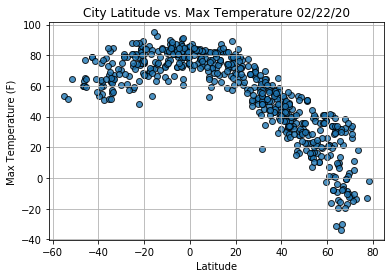

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

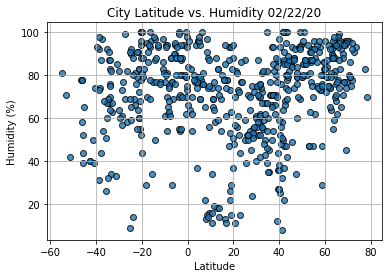

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

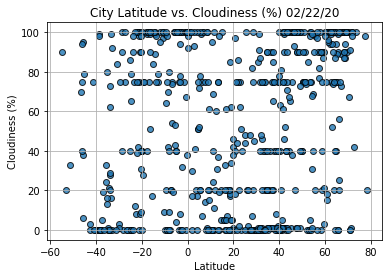

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

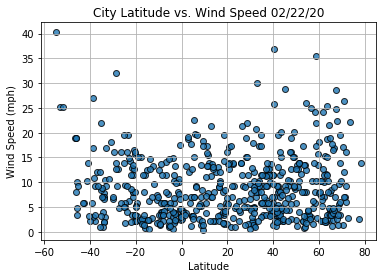

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [55]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is is: {r_value:.3f}")

In [32]:
index13 = city_data_df.loc[13]
index13

City                      Aasiaat
Country                        GL
Date          2020-02-23 02:11:43
Lat                         68.71
Lng                        -52.87
Max Temp                    -8.45
Humidity                       96
Cloudiness                     87
Wind Speed                   9.57
Name: 13, dtype: object

In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [57]:
from scipy.stats import linregress

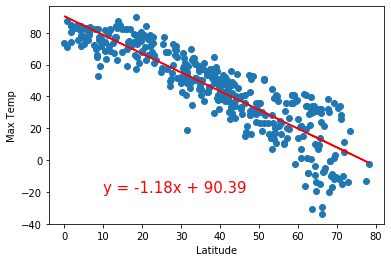

The r-value is is: -0.886


In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))

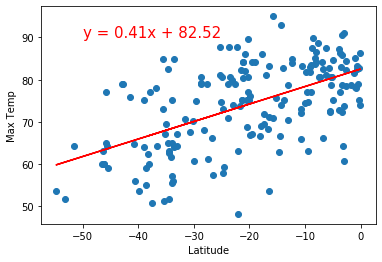

The r-value is is: 0.563


In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

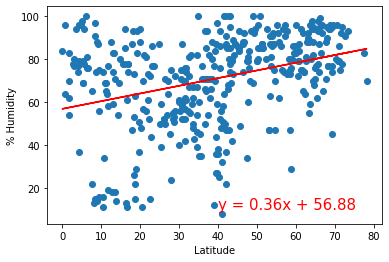

The r-value is is: 0.334


In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

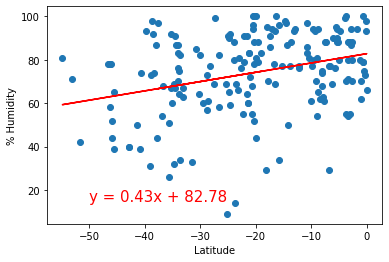

The r-value is is: 0.316


In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

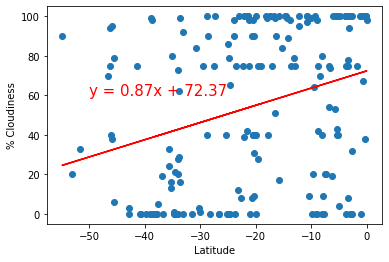

The r-value is is: 0.301


In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

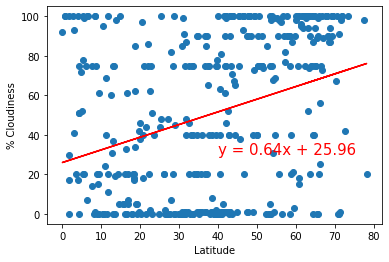

The r-value is is: 0.322


In [63]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))


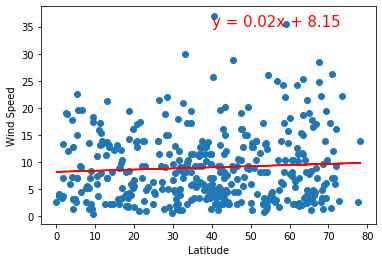

The r-value is is: 0.065


In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

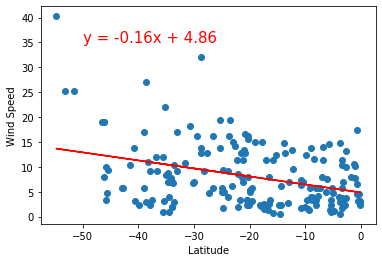

The r-value is is: -0.354


In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))